In [100]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # This matches LaTeX's default font
    "font.size": 11,                       # This matches the 11pt in \documentclass
})




np.random.seed(88)

n = 27

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X

def Gradient_OLS(X, y,theta, n=100):
    return (2.0/n)*X.T @ (X @ theta-y)
def Gradient_Ridge(X, y, theta, lambda_param=1.0,n=100):
    return (2.0/n)*X.T @ (X @ theta-y) + 2*lambda_param*theta 

# Part 2 of the project
## Part G : Bias-variance trade-off and resampling techniques
This only focuses on the OLS method


### Resampling by using bootstrap on OLS

Create something equvivalent to the following using my test data

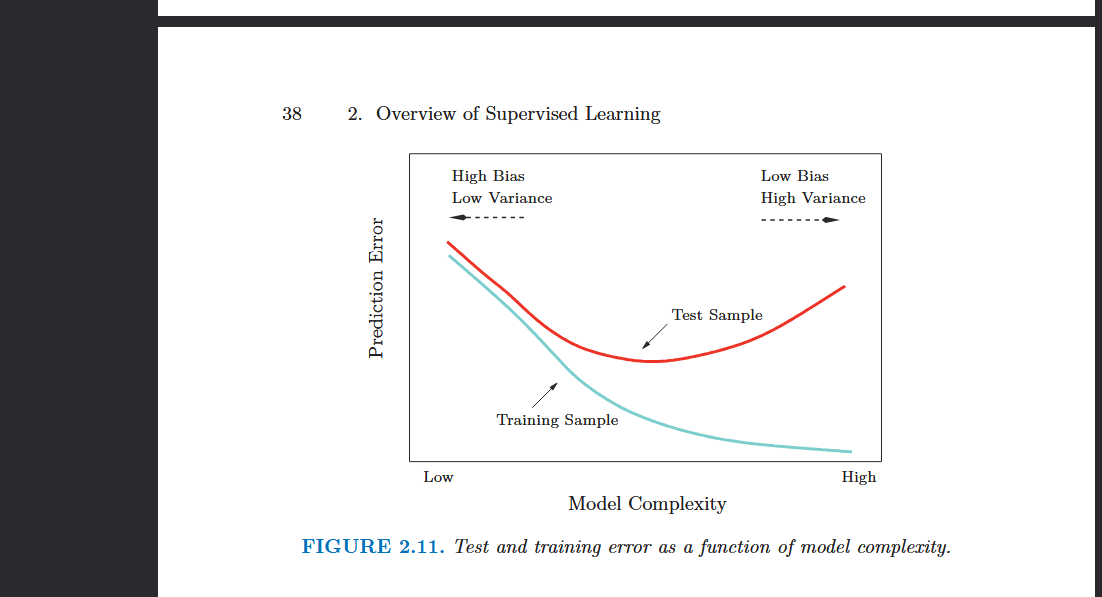

In [101]:
# Ordinary Least Squares Analytical solution
def OLS_parameters(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

Plot saved as Combined_Analysis_3_Plots.png


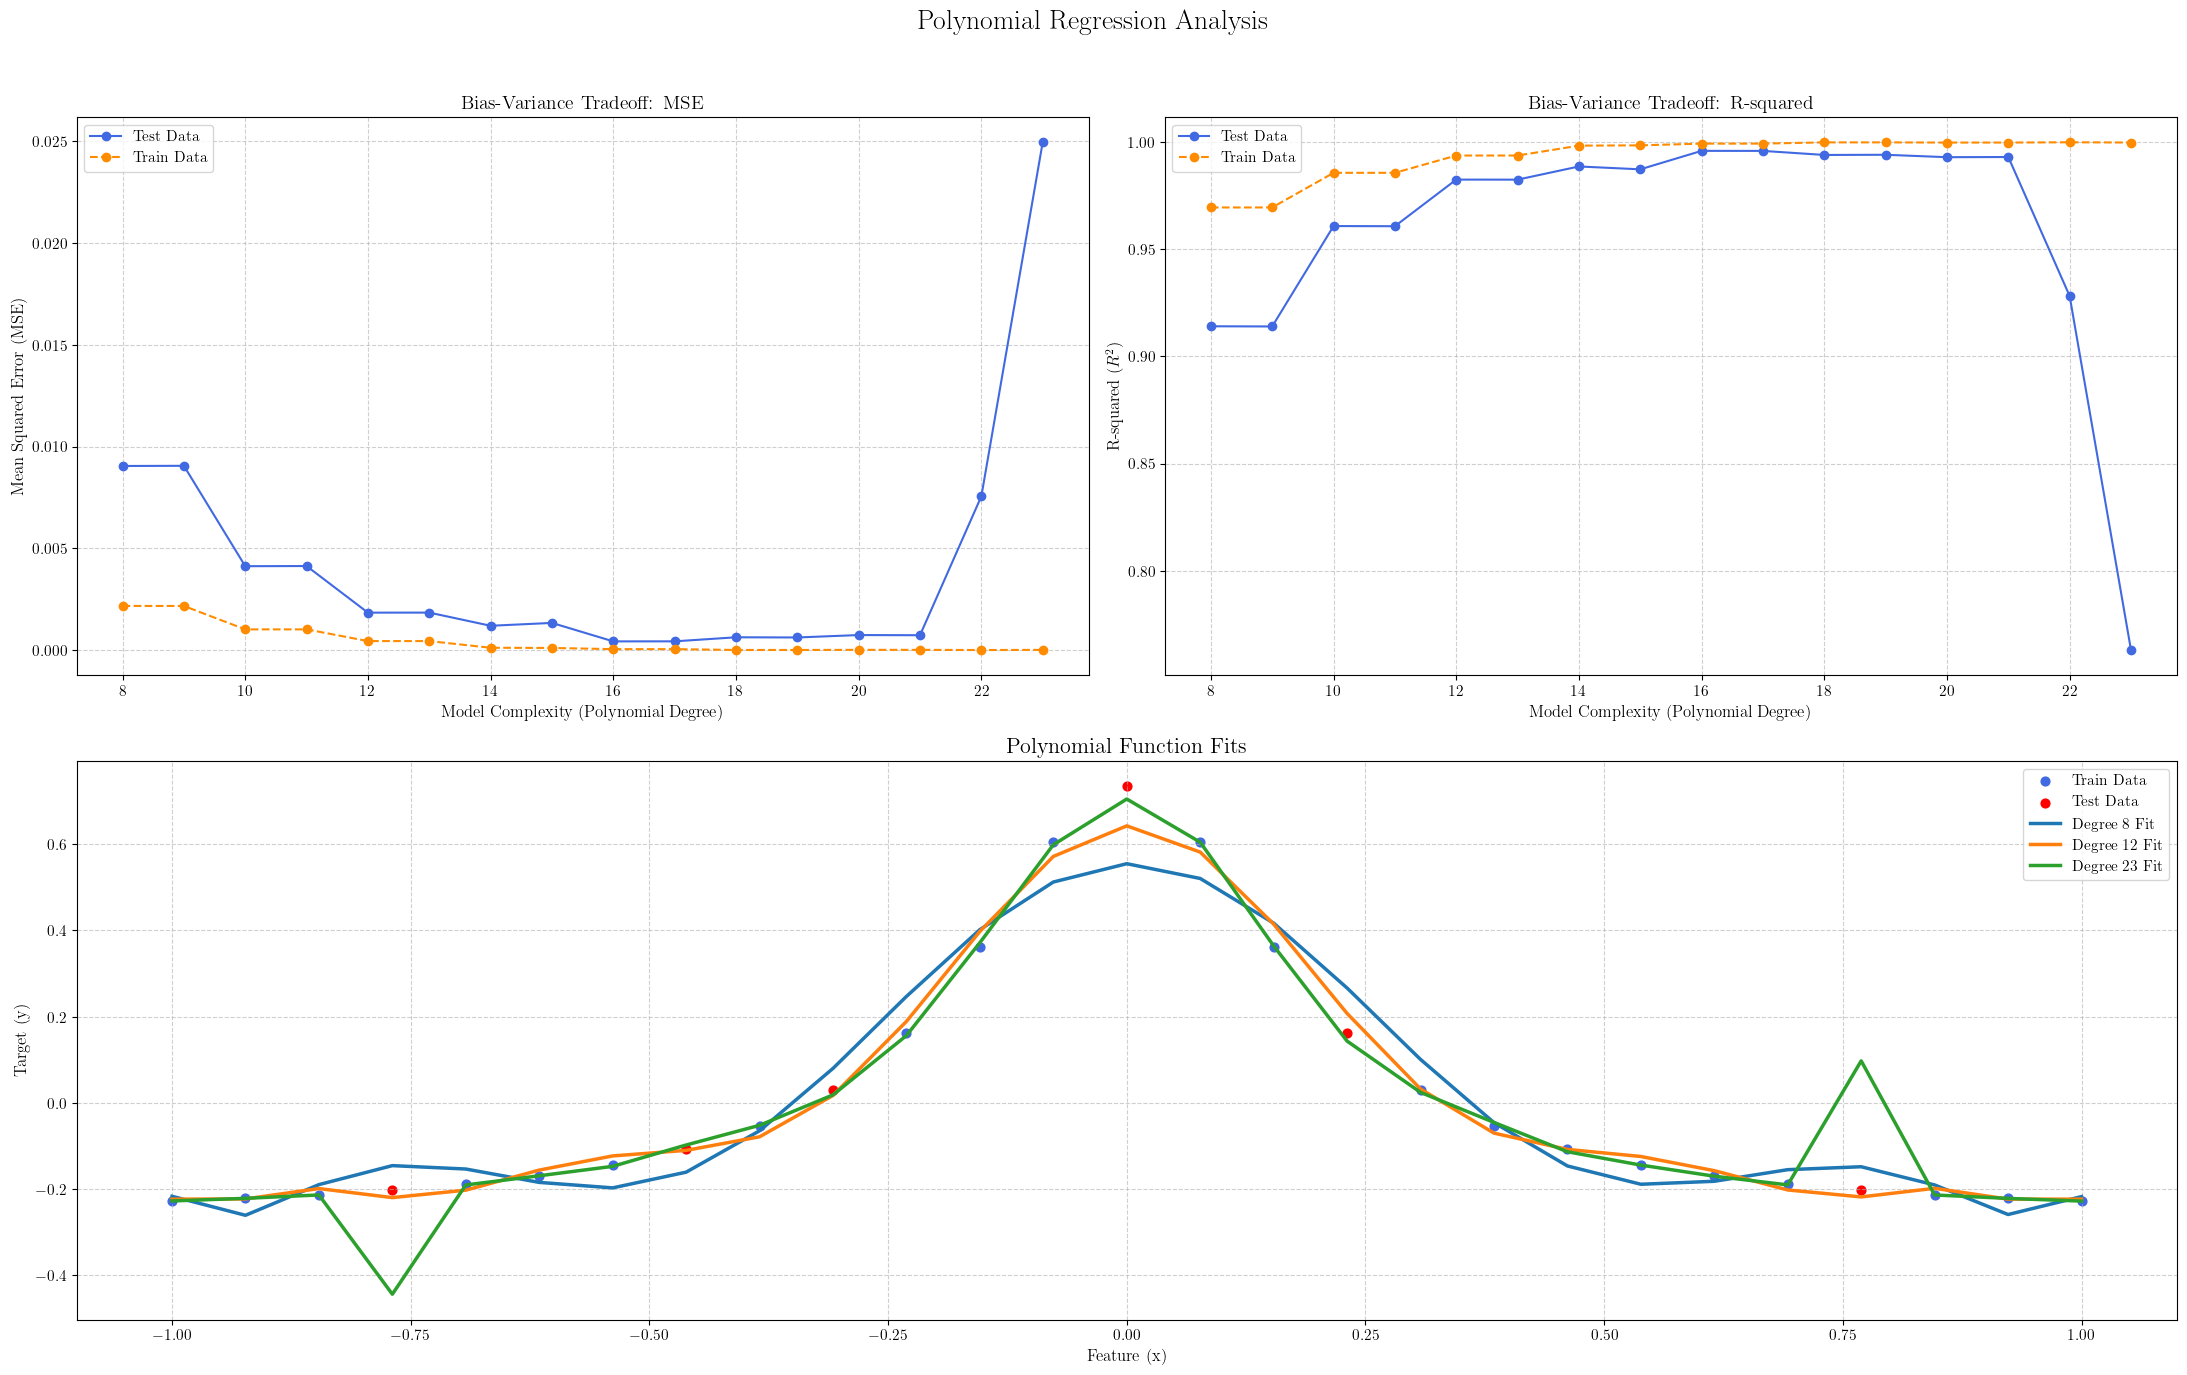

Plot saved as OLS_BiasVariance_SideBySide.png


<Figure size 640x480 with 0 Axes>

In [102]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []

degreestart = 8

degrees = np.arange(degreestart, 24)

scalers = {}

y_centered = y_noise - y_noise.mean()

for degree in degrees:
    X = polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    scalers[degree] = scaler
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)
    
    # Scaling the data for numerical stability
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)

    beta = OLS_parameters(X_train, y_train)
    beta_norms.append(beta)

    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    mse_predict = MSE(y_test, y_pred)
    mse_train = MSE(y_train, y_train_pred)
    r2_predict = R2(y_test, y_pred)
    r2_train = R2(y_train, y_train_pred)
    
    plot_predict["mse"].append(mse_predict)
    plot_predict["r2"].append(r2_predict)
    plot_train["mse"].append(mse_train)
    plot_train["r2"].append(r2_train)

fig = plt.figure(figsize=(22, 14))
gs = gridspec.GridSpec(2, 2)
fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1]) 
ax3 = fig.add_subplot(gs[1, :]) 

ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("Bias-Variance Tradeoff: MSE", fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)
# Set a y-limit to keep the plot readable, as MSE can explode for high degrees


# --- Plot 2: R-squared (on the second axis, ax2) ---
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)
ax2.set_title("Bias-Variance Tradeoff: R-squared", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)
# R2 is bounded by 1, negative values indicate a very poor fit

train_x, test_x, train_y, test_y = train_test_split(x, y_centered, test_size=0.2, random_state=57)


ax3.scatter(train_x, train_y, label='Train Data', color='royalblue', s=40)
ax3.scatter(test_x, test_y, label='Test Data', color='red', s=40)
ax3.legend()


plotted_degrees = [8, 12, 23]



for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - degreestart]
    
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)


# --- Save and show the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Combined_Analysis_3_Plots.png")
print("Plot saved as Combined_Analysis_3_Plots.png")
plt.show()

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Save the figure to a file and display it
plt.savefig("OLS_BiasVariance_SideBySide.png")
print("Plot saved as OLS_BiasVariance_SideBySide.png")
plt.show()

Because the computer is having problems inverting the matrix when it becomes to complex we will stay a bit low and lower points instead and adding some noise

### Reformulate the expectation value to include variance and bias

To be added in the Theory part

Proof.

First write out what the terms are for the expectation value of $\mathbb{E}[(y-\tilde{y})^2]$:

\begin{align*}
\mathbb{E}[(y-\tilde{y})^2 ]&= \mathbb{E}[(y-\tilde{y}) (y-\tilde{y}) ] \\
&= \mathbb{E}[(y^2-\tilde{y} y -y \tilde{y} +\tilde{y}^2)] \\
&= \mathbb{E}[y^2] - 2 \mathbb{E}[\tilde{y} y] +\mathbb{E}[\tilde{y}^2] \\
\end{align*}

First, looking into the function $\mathbb{E}[\tilde{y}^2]$ and using $\mathrm{var}[\tilde{y}] = \mathbb{E}[y^2] - \mu_y^2$ we see that this can be written as 
$$
\mathbb{E}[\tilde{y}^2] = \mathrm{var}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2.
$$

Secondly looking closer at $\mathbb{E}[y^2]$ and writing the function $y$ as $f + \varepsilon$, where we assuming $f$ to be non stochastic and $\varepsilon \sim N(0, \sigma^2)$, we get:

$$
\mathbb{E}[(f+\varepsilon)^2] = \mathbb{E}[f^2] + 2 \mathbb{E}[f]\mathbb{E}[\varepsilon] + \mathbb{E}[\varepsilon^2] = \mathbb{E}[f^2] + \sigma^2 = f^2 + \sigma^2
$$

Lastly the term $\mathbb{E}[\tilde{y} y]$, becomes the following since $\tilde{y}$ and $\varepsilon$ are independent so we can distribute the expectation operation.

$$
\mathbb{E}[\tilde{y} (f + \varepsilon)] = \mathbb{E}[\tilde{y} f] + \mathbb{E}[\tilde{y} \varepsilon] = f \mathbb{E}[\tilde{y}] + 0
$$

Taking everything together we get:

\begin{align*}
&=\mathbb{E}[y^2] - 2 \mathbb{E}[\tilde{y} y] +\mathbb{E}[\tilde{y}^2] \\
&= f^2 + \sigma^2 - 2 f \mathbb{E}[\tilde{y}] +\mathrm{var}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2 \\
&= f^2 - 2 f \mathbb{E}[\tilde{y}] + \mathbb{E}[\tilde{y}]^2 + \mathrm{var}[\tilde{y}] + \sigma^2 \\
&= \mathbb{E}[ (f - \mathbb{E}[\tilde{y}])^2] + \mathrm{var}[\tilde{y}] + \sigma^2 \\
&= \mathrm{bias}[\tilde{y}]  + \mathrm{var}[\tilde{y}] + \sigma^2 \
\end{align*}

Where we have approximated $f$ with $y$, in the last step in order to evaluate it as f is unknown
- - -


### Biance Variance Analysis on the Runge function

Looking at the MSE values we get from increasing complexity we see that when the complexity or degree of our model is lower than 16 we are sill improving then it becomes slowly worse until it explodes.


### Discussion on bootstrap
Discuss the bias and variance trade-off as function of your model complexity (the degree of
the polynomial) and the number of data points, and possibly also your training and test data
using the bootstrap resampling method. You can follow the code example in the jupyter-
book at https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/

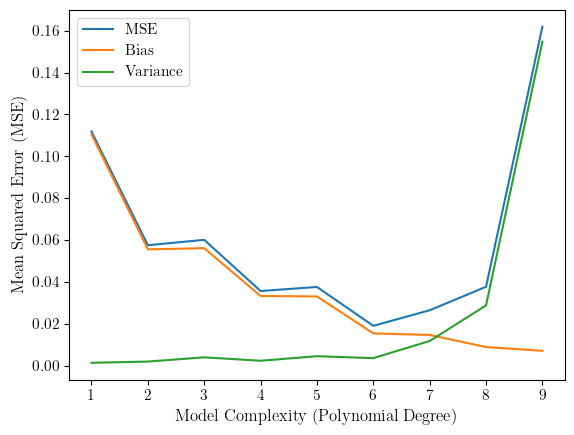

In [106]:
from sklearn.utils import resample

np.random.seed(88)

bootstraps = 1000

start_deg = 1
end_deg = 10


y_centered = y_noise - y_noise.mean()
biases = []
variances = []
mses = []

for p in range(start_deg, end_deg):
   X = polynomial_features(x, p)
   scaler = StandardScaler()
   X = scaler.fit_transform(X)
   X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)
    
   predictions = np.zeros((bootstraps, len(y_test)))
   targets = np.zeros((bootstraps, len(y_test)))

   for b in range(bootstraps):
      X_train_re, y_train_re = resample(X_train, y_train)
      beta = OLS_parameters(X_train_re, y_train_re)
      predictions[b, :] = (X_test @ beta).flatten()
      targets[b, :] = y_test.flatten()

   biases.append((np.mean(predictions, axis=0) - np.mean(targets, axis=0)) ** 2)
   variances.append(np.var(predictions, axis=0))
   mses.append(mean_squared_error(predictions, targets))

plt.plot(range(start_deg, end_deg), mses, label="MSE")
plt.plot(range(start_deg, end_deg), np.mean(biases, axis=1), label="Bias")
plt.plot(range(start_deg, end_deg), np.mean(variances, axis=1), label="Variance")
plt.xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend()
plt.savefig('bias_variance_tradeoff.pdf', format='pdf', bbox_inches='tight')
plt.show()
